In [15]:


import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2



import warnings
warnings.filterwarnings('ignore')



In [2]:
data='data1a'
train=os.path.join(data,'training/')
val=os.path.join(data,'validation/')

train_dam=os.path.join(train,'00-damage')
train_whole=os.path.join(train,'01-whole')

val_dam=os.path.join(val,'00-damage')
val_whole=os.path.join(val,'01-whole')

In [3]:
print("Total Training images : ",len(os.listdir(train_dam))+len(os.listdir(train_whole)))
print("Total validation images : ",len(os.listdir(val_dam))+len(os.listdir(val_whole)))
print("Total Damaged Car images : ",len(os.listdir(train_dam))+len(os.listdir(val_dam)))
print("Total nodamage Car images : ",len(os.listdir(train_whole))+len(os.listdir(val_whole)))

Total Training images :  1840
Total validation images :  460
Total Damaged Car images :  1150
Total nodamage Car images :  1150


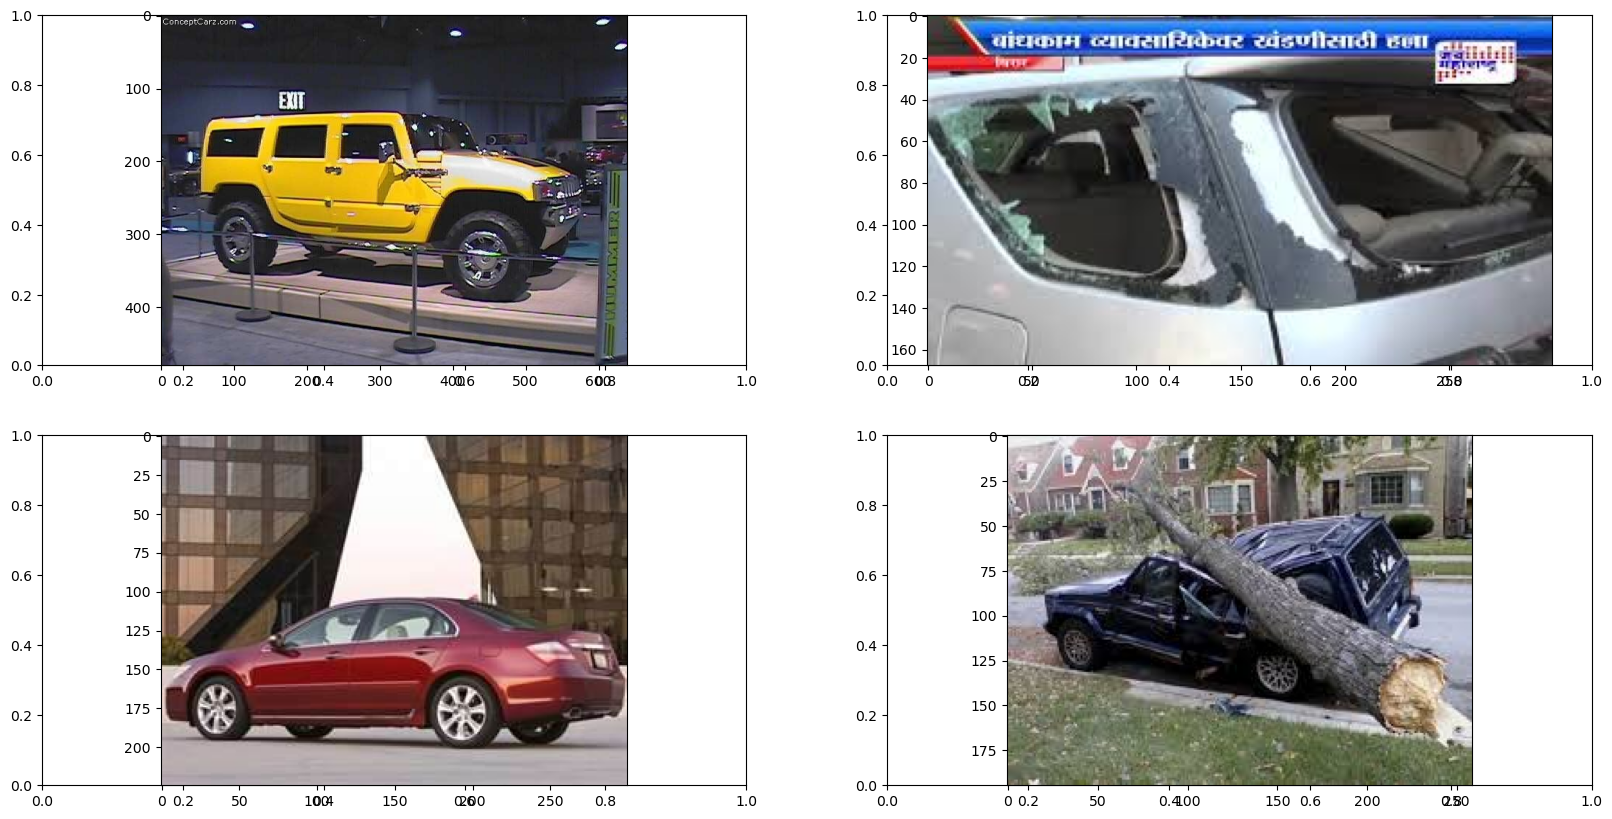

In [5]:

#plotting some images

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
im1=cv2.imread("./data1a/training/01-whole/0002.jpg")
fig.add_subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
im2=cv2.imread("./data1a/training/00-damage/0001.JPEG")
fig.add_subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
im3=cv2.imread("./data1a/validation/01-whole/0001.jpg")
fig.add_subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
im4=cv2.imread("./data1a/validation/00-damage/0001.JPEG")
fig.add_subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(im4, cv2.COLOR_BGR2RGB))



In [10]:



train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30, zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)


train_set = train_datagen.flow_from_directory(train,  target_size=(125, 125), batch_size=32, class_mode='binary')
validation_set = val_datagen.flow_from_directory(val,target_size=(125, 125),batch_size=32,class_mode='binary')




Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [11]:
from tensorflow.keras import Model 
from tensorflow.keras.applications import DenseNet121
import keras

In [12]:
model=keras.Sequential([DenseNet121(input_shape =(125,125, 3),include_top=False,weights='imagenet'),tf.keras.layers.Flatten(),tf.keras.layers.Dense(512, activation='relu'),tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=2e-4),metrics=['Accuracy','Precision','Recall'])

In [16]:
#import warning
import warnings
warnings.filterwarnings('ignore')
stats=model.fit(train_set,epochs=15,validation_data=validation_set,verbose=1)

Epoch 1/15


2023-04-13 11:04:45.074233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


58/58 [==============================] - 122s 2s/step - loss: 0.4781 - Accuracy: 0.8082 - precision: 0.8308 - recall: 0.7739 - val_loss: 519.9152 - val_Accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/15
58/58 [==============================] - 122s 2s/step - loss: 0.4043 - Accuracy: 0.8261 - precision: 0.8409 - recall: 0.8043 - val_loss: 12.6761 - val_Accuracy: 0.6000 - val_precision: 0.6716 - val_recall: 0.3913
Epoch 3/15
58/58 [==============================] - 122s 2s/step - loss: 0.3896 - Accuracy: 0.8408 - precision: 0.8591 - recall: 0.8152 - val_loss: 14.4355 - val_Accuracy: 0.5457 - val_precision: 0.5240 - val_recall: 0.9957
Epoch 4/15
58/58 [==============================] - 123s 2s/step - loss: 0.3581 - Accuracy: 0.8533 - precision: 0.8571 - recall: 0.8478 - val_loss: 1.8406 - val_Accuracy: 0.6587 - val_precision: 0.5948 - val_recall: 0.9957
Epoch 5/15
58/58 [==============================] - 122s 2s/step - loss: 0.3332 - Accuracy: 0.8679 - precision: 0.8

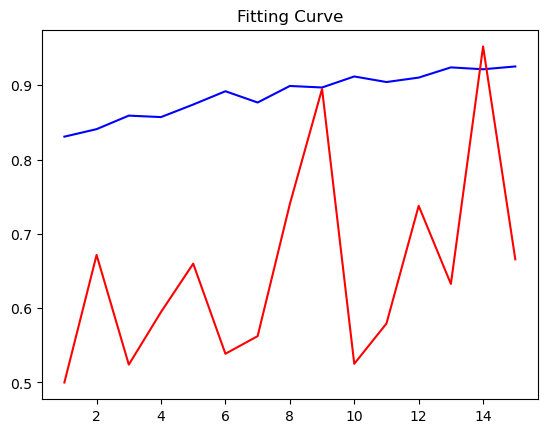

In [17]:


ep=[]
for i in range(1,16):
    ep.append(i)
train_accuracy = stats.history['precision']
val_accuracy = stats.history['val_precision']

plt.plot(ep,train_accuracy,'b',label='Training accuracy')
plt.plot(ep, val_accuracy,'r', label='Validation accuracy')
plt.title('Fitting Curve')
plt.show()

In [19]:


#weights saving
model.save("weights.h5")

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model('weights.h5')

img_path = 'data1a/training/01-whole/0025.jpg'

img = image.load_img(img_path, target_size=(125, 125))

x = image.img_to_array(img)

x = x / 255.0

x = np.expand_dims(x, axis=0)

prediction = model.predict(x)


if prediction < 0.5:
    print("The car is Damaged")
else:
    print("The car is not Damaged")


1/1 [==============================] - 1s 1s/step
The car is damaged
